In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

In [4]:
from Pymod import prep

In [5]:
WT_08_lbl, WT_08_rtot, WT_08_lig, WT_08_sat = prep.datprep('Data/EGFR_WT_08_Sat.csv','Data/EGFR_WT_08_Rtot.csv')

hootie hoo! the indices match!


In [7]:
from plotter import semlog

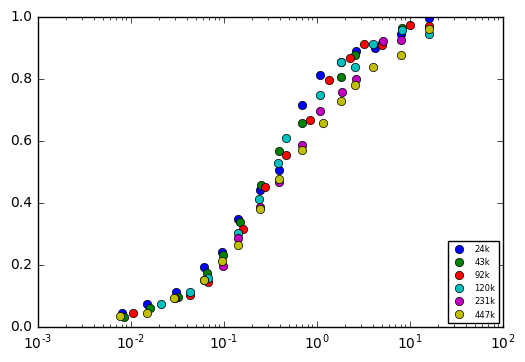

In [8]:
semlog(WT_08_lig,WT_08_sat,WT_08_lbl)

In [9]:
%autoreload

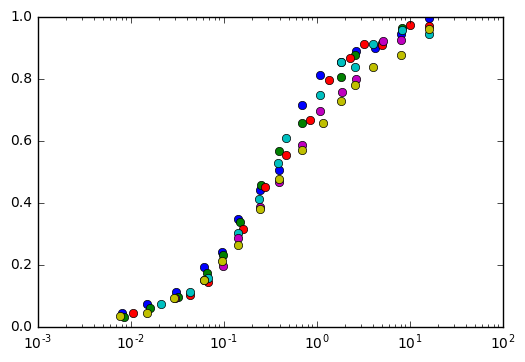

In [10]:
semlog(WT_08_lig,WT_08_sat)

In [32]:
k11r = np.random.normal(4.6,0.6,10000)

In [33]:
k21r = np.random.normal(5.3,0.4,10000)

In [34]:
k22r = np.random.normal(0.34,0.11,10000)

In [35]:
l20r = np.random.normal(530.,220.,10000)

In [36]:
(l20r < 0).sum()

76

In [38]:
np.info(np.ma)

Masked Arrays

Arrays sometimes contain invalid or missing data.  When doing operations
on such arrays, we wish to suppress invalid values, which is the purpose masked
arrays fulfill (an example of typical use is given below).

For example, examine the following array:

>>> x = np.array([2, 1, 3, np.nan, 5, 2, 3, np.nan])

When we try to calculate the mean of the data, the result is undetermined:

>>> np.mean(x)
nan

The mean is calculated using roughly ``np.sum(x)/len(x)``, but since
any number added to ``NaN`` [1]_ produces ``NaN``, this doesn't work.  Enter
masked arrays:

>>> m = np.ma.masked_array(x, np.isnan(x))
>>> m
masked_array(data = [2.0 1.0 3.0 -- 5.0 2.0 3.0 --],
      mask = [False False False  True False False False  True],
      fill_value=1e+20)

Here, we construct a masked array that suppress all ``NaN`` values.  We
may now proceed to calculate the mean of the other values:

>>> np.mean(m)
2.6666666666666665

.. [1] Not-a-Number, a floating point value that is the res

In [41]:
b = np.ma.masked_array(l20r,(l20r < 0))

In [42]:
(b > 0).all()

True

In [43]:
(l20r > 0).all()

False

(array([   12.,   100.,   618.,  1801.,  2967.,  2712.,  1340.,   388.,
           58.,     4.]),
 array([ -312.49528039,  -138.5726635 ,    35.34995339,   209.27257028,
          383.19518718,   557.11780407,   731.04042096,   904.96303785,
         1078.88565474,  1252.80827163,  1426.73088853]),
 <a list of 10 Patch objects>)

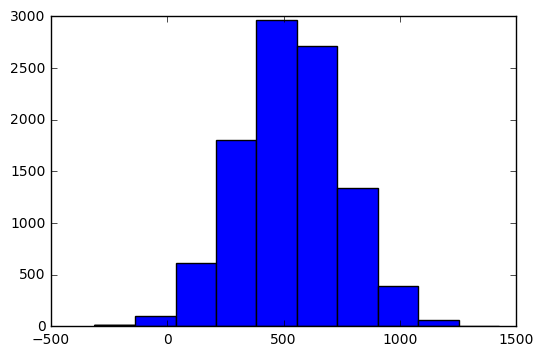

In [44]:
plt.hist(b)

(array([  2.93000000e+02,   9.47000000e+02,   1.95400000e+03,
          2.48600000e+03,   2.21600000e+03,   1.32100000e+03,
          5.38000000e+02,   1.44000000e+02,   2.40000000e+01,
          1.00000000e+00]),
 array([  6.51027314e-01,   1.43259013e+02,   2.85867000e+02,
          4.28474986e+02,   5.71082972e+02,   7.13690958e+02,
          8.56298944e+02,   9.98906930e+02,   1.14151492e+03,
          1.28412290e+03,   1.42673089e+03]),
 <a list of 10 Patch objects>)

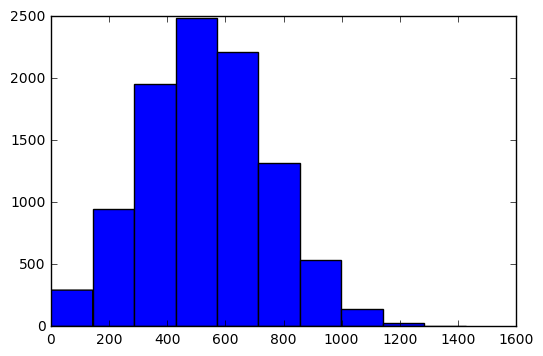

In [48]:
plt.hist(b.compressed())

In [50]:
b.harden_mask()

masked_array(data = [474.8469018503238 121.05722731220516 574.6433267558915 ...,
 663.5898820265799 696.006922142763 453.99097341424186],
             mask = [False False False ..., False False False],
       fill_value = 1e+20)

(array([  2.93000000e+02,   9.47000000e+02,   1.95400000e+03,
          2.48600000e+03,   2.21600000e+03,   1.32100000e+03,
          5.38000000e+02,   1.44000000e+02,   2.40000000e+01,
          1.00000000e+00]),
 array([  6.51027314e-01,   1.43259013e+02,   2.85867000e+02,
          4.28474986e+02,   5.71082972e+02,   7.13690958e+02,
          8.56298944e+02,   9.98906930e+02,   1.14151492e+03,
          1.28412290e+03,   1.42673089e+03]),
 <a list of 10 Patch objects>)

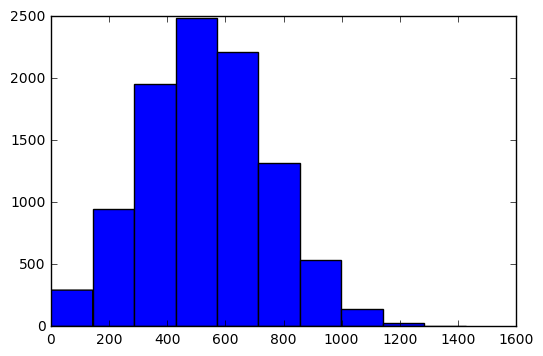

In [53]:
plt.hist(b.compressed())

In [55]:
kone = 1.43

In [56]:
def dilser(low=0.001, limit=100.0, dilfactor = 2.0):
    """Returns a numpy array containing a dilution series that ranges from
    "low" to "limit" by "dilfactor".
    """
    a = [low]
    while a[-1] <= limit:
        a.append(a[len(a)-1]*dilfactor)
    
    return np.asarray(a)

In [57]:
ligs = dilser()

In [58]:
ligs

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [79]:
def unisite(k,lig,dat=None):
    bfrac = (k*lig)/(1 + (k*lig))
    
    if dat is None:
        return bfrac
    else:
        return (bfrac - dat)

In [80]:
sats = unisite(kone,ligs)

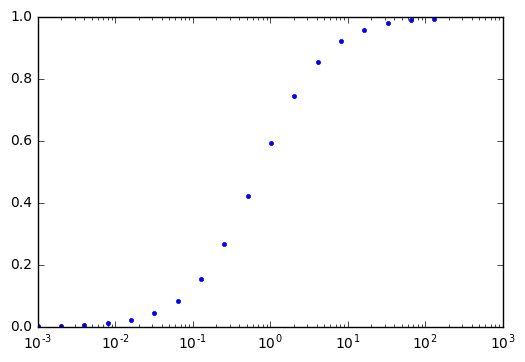

In [81]:
plt.semilogx(ligs,sats,'.')

In [82]:
satn = np.random.normal(1,0.08,len(sats))*sats

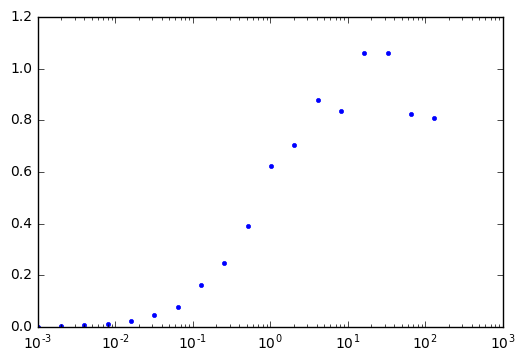

In [83]:
plt.semilogx(ligs,satn,'.')

In [77]:
from scipy import optimize

In [90]:
kguess = 7.4

In [96]:
res = optimize.least_squares(unisite,kguess,args=(ligs,sats))

In [97]:
res.x

array([ 1.43])

In [93]:
satnma = np.ma.masked_array(satn,(satn > 1))

In [94]:
(satn < 1).all()

False

In [95]:
(satnma < 1).all()

True

In [98]:
res = optimize.least_squares(unisite,kguess,args=(ligs,satnma))

In [99]:
res.x

masked_array(data = [6.035743422057681],
             mask = [False],
       fill_value = 1e+20)

In [100]:
satnma

masked_array(data = [0.0013962981082627879 0.0026250964176482397 0.005853968661278689
 0.011091684972709655 0.022311903253093356 0.046219203582836696
 0.0782851414572923 0.16149430093889475 0.24638281713061871
 0.39235879344672425 0.6214033058052734 0.7033441354843506
 0.8786321257847763 0.8365868225684567 -- -- 0.822494523090472
 0.8075705491235998],
             mask = [False False False False False False False False False False False False
 False False  True  True False False],
       fill_value = 1e+20)

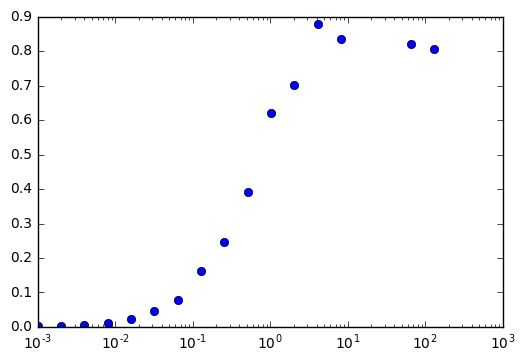

In [102]:
plt.semilogx(ligs,satnma,'o')

In [106]:
np.invert(satnma.mask)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True], dtype=bool)

In [107]:
ligs

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   1.63840000e+01,
         3.27680000e+01,   6.55360000e+01,   1.31072000e+02])

In [109]:
ligsma = ligs[np.invert(satnma.mask)]

In [112]:
satnma.all

<bound method MaskedArray.all of masked_array(data = [0.0013962981082627879 0.0026250964176482397 0.005853968661278689
 0.011091684972709655 0.022311903253093356 0.046219203582836696
 0.0782851414572923 0.16149430093889475 0.24638281713061871
 0.39235879344672425 0.6214033058052734 0.7033441354843506
 0.8786321257847763 0.8365868225684567 -- -- 0.822494523090472
 0.8075705491235998],
             mask = [False False False False False False False False False False False False
 False False  True  True False False],
       fill_value = 1e+20)
>

In [111]:
satn.size

18

In [113]:
sats

array([ 0.00142796,  0.00285184,  0.00568747,  0.01131061,  0.02236822,
        0.04375765,  0.08384638,  0.15472004,  0.26797845,  0.42268613,
        0.59420854,  0.74545899,  0.85416958,  0.92135001,  0.95906525,
        0.97910496,  0.98944218,  0.99469307])

In [115]:
satsdope = sats

In [126]:
satsdope[14:16]=1.2

In [128]:
satsdope[12]=1.1

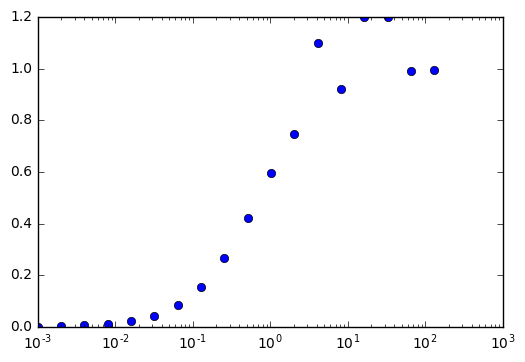

In [129]:
plt.semilogx(ligs,satsdope,'o')

In [130]:
res = optimize.least_squares(unisite,kguess,args=(ligs,satsdope))

In [131]:
kguess

7.4

In [132]:
res.x

array([ 1.68339272])

In [133]:
satsdopema = np.ma.masked_array(satsdope,(satsdope>1))

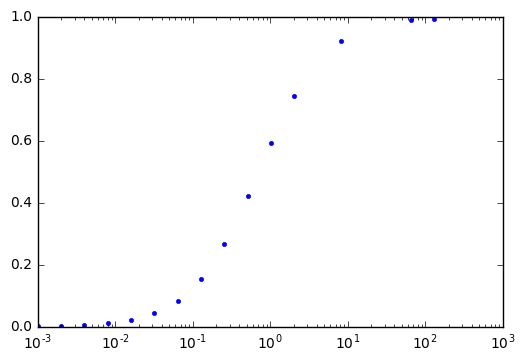

In [135]:
plt.semilogx(ligs,satsdopema,'.')

In [136]:
res = optimize.least_squares(unisite,kguess,args=(ligs,satsdopema))

In [137]:
res.x

masked_array(data = [6.046494329327273],
             mask = [False],
       fill_value = 1e+20)

array([  1.00000000e-03,   2.00000000e-03,   4.00000000e-03,
         8.00000000e-03,   1.60000000e-02,   3.20000000e-02,
         6.40000000e-02,   1.28000000e-01,   2.56000000e-01,
         5.12000000e-01,   1.02400000e+00,   2.04800000e+00,
         4.09600000e+00,   8.19200000e+00,   6.55360000e+01,
         1.31072000e+02])

In [142]:
mask = np.invert(satsdopema.mask)

In [141]:
satsdopema

True

In [144]:
sats_masked = sats[mask]

In [145]:
ligs_masked = ligs[mask]

In [146]:
res = optimize.least_squares(unisite,kguess,args=(ligs_masked,sats_masked))

In [147]:
res.x

array([ 1.43])